In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import beta
import pandas as pd

In [2]:
N = 1000
p = 0.3

np.random.seed(12345)
tosses = (np.random.rand(N) <= p).astype(int)
print(tosses.sum())

301


In [3]:
@np.vectorize
def get_first_n_tosses(n, tosses = tosses):
    return tosses[:n].sum()

In [78]:
v = np.array([1, 50, 100, 300, 700, 1000])
x = get_first_n_tosses(v)
print(v)
print(x)

[   1   50  100  300  700 1000]
[  0  13  23  82 202 301]


In [79]:
xc = x.copy()

In [67]:
df = pd.read_csv(r'C:\Users\ma_gi\Documents\astrostat\data.csv')
df

,data
0,1
1,0
2,0
3,0
4,0
...,...
995,1
996,0
997,0
998,0


In [75]:
d = df['data'].to_numpy()
xd = np.array([d[:vv].sum() for vv in v])
print(xd)

[  1  18  37  89 191 291]


In [5]:
delta_p = 1e-3
p_vec = np.arange(0, 1, delta_p)
def binom(k, n):
    delta_p = 1e-3
    p_vec = np.arange(0, 1, delta_p)
    y = p_vec**k*(1-p_vec)**(n-k)
    I = (y*delta_p).sum()
    return y/I

In [6]:
# %matplotlib inline

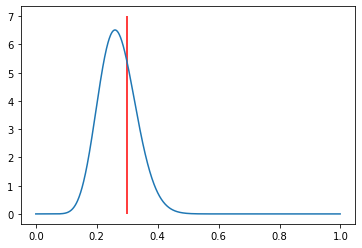

In [7]:
fig, ax = plt.subplots()
ax.plot(p_vec, binom(x[1], v[1]))
ax.vlines(p, 0, 7, 'r')

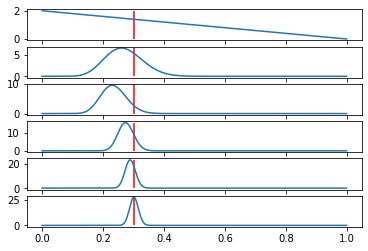

In [8]:
fig, ax = plt.subplots(len(v))

for i in range(len(v)):
    ax[i].plot(p_vec, binom(x[i], v[i]))
    ax[i].vlines(p, 0, binom(x[i], v[i]).max(), 'r')

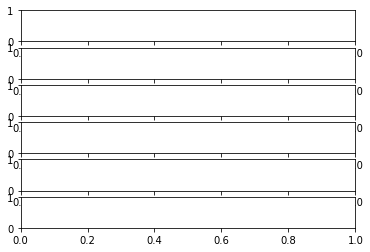

In [9]:
fig, ax = plt.subplots(len(v))

for xx, vv in zip():
    ax[i].plot(p_vec, binom(x[i], v[i]))
    ax[i].vlines(p, 0, binom(x[i], v[i]).max(), 'r')

In [10]:
def gaussian(x, mu, sigma): 
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*((x-mu)/sigma)**2)

In [11]:
def binom_gauss(k, n, mu, sigma):
    delta_p = 1e-3
    p_vec = np.arange(0, 1, delta_p)
    y = p_vec**k*(1-p_vec)**(n-k)
    y *= gaussian(p_vec, mu, sigma)
    I = (y*delta_p).sum()
    return y/I

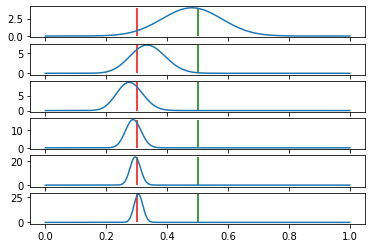

In [12]:
fig, ax = plt.subplots(len(v))

for i in range(len(v)):
    ax[i].plot(p_vec, binom_gauss(x[i], v[i], 0.5, 0.1))
    ax[i].vlines(p, 0, binom_gauss(x[i], v[i], 0.5, 0.1).max(), 'r')
    ax[i].vlines(.5, 0, binom_gauss(x[i], v[i], 0.5, 0.1).max(), 'g')

In [28]:
v

array([   1,   50,  100,  300,  700, 1000])

In [59]:
std_u = np.zeros(len(v))
std_g = std_u.copy()

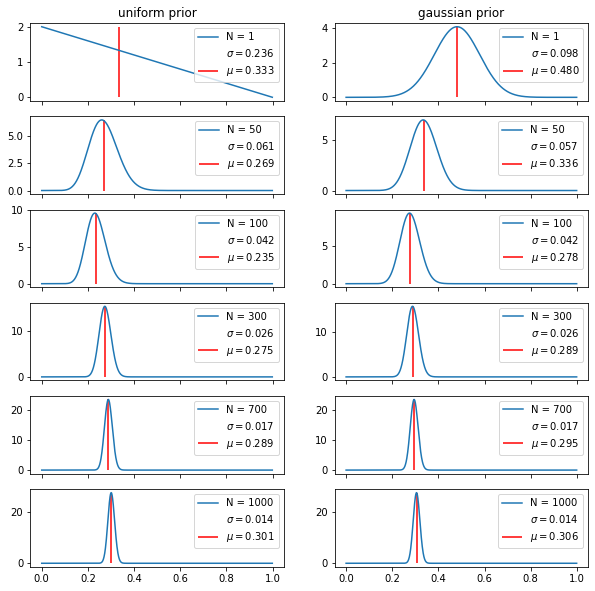

In [86]:
v2 = v.copy()
v2[0] = 0
x = xc.copy()

fig, ax = plt.subplots(len(v), 2, sharex = True, figsize = (10, 10))

for i in range(len(v)):
    ax[i,0].plot(p_vec, binom(x[i], v[i]), label = f'N = {v[i]}')
    ax[i,1].plot(p_vec, binom_gauss(x[i], v[i], 0.5, 0.1), label = f'N = {v[i]}')

    # ax[i,0].vlines(p, 0, binom(x[i], v[i], 0.5, 0.1).max(), 'r', label = r'$H_{true}$ = 0.3')
    # ax[i,1].vlines(p, 0, binom_gauss(x[i], v[i], 0.5, 0.1).max(), 'r', label = r'$H_{true}$ = 0.3')
    # ax[i,1].vlines(.5, 0, binom_gauss(x[i], v[i], 0.5, 0.1).max(), 'g', label = r'$\mu_{prior}$ = 0.5')

    # ax[i,1].vlines((p_vec*binom_gauss(x[i], v[i], 0.5, 0.1)).mean(), 0, binom_gauss(x[i], v[i], 0.5, 0.1).max(), 'r', label = f'$\\mu = {1}$')

    mp = (p_vec*binom(x[i], v[i])*delta_p).sum() # tecnicamente serve questo ma posso anche non moltiplicare per delta_p e usare .mean() anziché .sum(), cioè divido per N grande = moltiplico per delta_p piccolo
    ax[i,0].vlines(mp, 0, binom(x[i], v[i]).max(), 'r', label = f'$\\mu = {mp:.3f}$')
    mg = (p_vec*binom_gauss(x[i], v[i], 0.5, 0.1)*delta_p).sum()
    ax[i,1].vlines(mg, 0, binom_gauss(x[i], v[i], 0.5, 0.1).max(), 'r', label = f'$\\mu = {mg:.3f}$')

    std_u[i] = np.sqrt(((p_vec - mp)**2*binom(x[i], v[i])*delta_p).sum())
    ax[i,0].plot([], [], ' ', label = f'$\\sigma = {std_u[i]:.3f}$')
    std_g[i] = np.sqrt(((p_vec - mg)**2*binom_gauss(x[i], v[i], 0.5, 0.1)*delta_p).sum())
    ax[i,1].plot([], [], ' ', label = f'$\\sigma = {std_g[i]:.3f}$')

    ax[i,0].legend(loc = 'upper right')
    ax[i,1].legend(loc = 'upper right')

ax[0,0].set_title('uniform prior')
ax[0,1].set_title('gaussian prior');
# plt.savefig('astrostat-1-comparison-originale.pdf')
plt.savefig(r'C:\Users\ma_gi\Documents\astrostat\astrostat-1-comparison-originale.pdf')

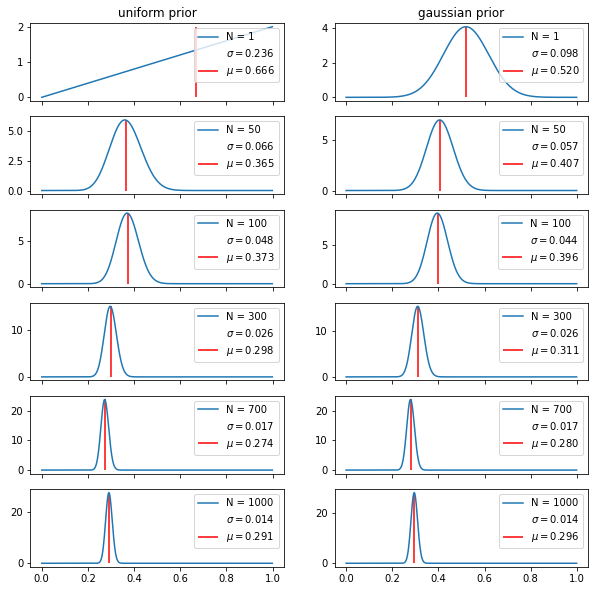

In [87]:
x = xd.copy()

fig, ax = plt.subplots(len(v), 2, sharex = True, figsize = (10, 10))

for i in range(len(v)):
    ax[i,0].plot(p_vec, binom(x[i], v[i]), label = f'N = {v[i]}')
    ax[i,1].plot(p_vec, binom_gauss(x[i], v[i], 0.5, 0.1), label = f'N = {v[i]}')

    # ax[i,0].vlines(p, 0, binom(x[i], v[i], 0.5, 0.1).max(), 'r', label = r'$H_{true}$ = 0.3')
    # ax[i,1].vlines(p, 0, binom_gauss(x[i], v[i], 0.5, 0.1).max(), 'r', label = r'$H_{true}$ = 0.3')
    # ax[i,1].vlines(.5, 0, binom_gauss(x[i], v[i], 0.5, 0.1).max(), 'g', label = r'$\mu_{prior}$ = 0.5')

    # ax[i,1].vlines((p_vec*binom_gauss(x[i], v[i], 0.5, 0.1)).mean(), 0, binom_gauss(x[i], v[i], 0.5, 0.1).max(), 'r', label = f'$\\mu = {1}$')

    mp = (p_vec*binom(x[i], v[i])*delta_p).sum() # tecnicamente serve questo ma posso anche non moltiplicare per delta_p e usare .mean() anziché .sum(), cioè divido per N grande = moltiplico per delta_p piccolo
    ax[i,0].vlines(mp, 0, binom(x[i], v[i]).max(), 'r', label = f'$\\mu = {mp:.3f}$')
    mg = (p_vec*binom_gauss(x[i], v[i], 0.5, 0.1)*delta_p).sum()
    ax[i,1].vlines(mg, 0, binom_gauss(x[i], v[i], 0.5, 0.1).max(), 'r', label = f'$\\mu = {mg:.3f}$')

    std_u[i] = np.sqrt(((p_vec - mp)**2*binom(x[i], v[i])*delta_p).sum())
    ax[i,0].plot([], [], ' ', label = f'$\\sigma = {std_u[i]:.3f}$')
    std_g[i] = np.sqrt(((p_vec - mg)**2*binom_gauss(x[i], v[i], 0.5, 0.1)*delta_p).sum())
    ax[i,1].plot([], [], ' ', label = f'$\\sigma = {std_g[i]:.3f}$')

    ax[i,0].legend(loc = 'upper right')
    ax[i,1].legend(loc = 'upper right')

ax[0,0].set_title('uniform prior')
ax[0,1].set_title('gaussian prior');
# plt.savefig('astrostat-1-comparison.pdf')
plt.savefig(r'C:\Users\ma_gi\Documents\astrostat\astrostat-1-comparison.pdf')

In [61]:
print(std_u)
print(std_g)

[0.23581985 0.06092767 0.04179594 0.02564678 0.0170995  0.01448886]
[0.09797891 0.05676779 0.04212834 0.02555774 0.01705393 0.01444645]


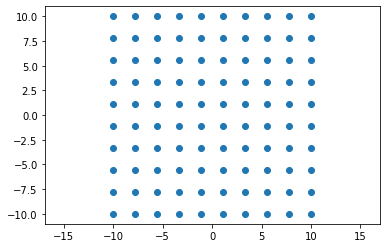

In [14]:
xx = np.linspace(-10,10,10)
X, Y = np.meshgrid(xx, xx)
plt.scatter(X.flatten(),Y.flatten())
plt.axis('equal');

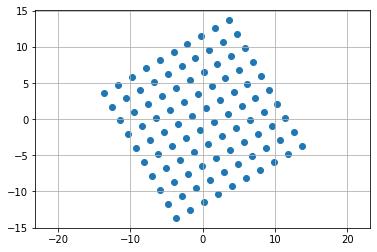

In [15]:
b = np.vstack((X.flatten(), Y.flatten()))

theta = np.pi/6
R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
c = R.dot(b)
xr = c[0,:]
yr = c[1,:]
plt.scatter(xr, yr)
plt.grid()
plt.axis('equal');